## Phase 2 Project Submission

Please fill out:
* Student name: Angelo Matthew Gayanelo
* Student pace: part time
* Scheduled project review date/time: June 30th, 2:30PM
* Instructor name:  Lindsey Berlin

## Part I: Business Understanding

King's Castles Corp is in the brainstorming phase of a new high end property development project. They are specifically interested in creating a luxurious enclosed subdivision with the express purpose of selling expensive homes.

They're new to the housing industry, just having gone bankrupt due to bad data reccomendations from a prior film start up they had invested in, and are looking to be cautious in their next investment.

They have tasked you with finding the core features that can help drive up price, and more importantly, quantifying how those features effect price.



## Part II: Data Understanding

The data contains a range of features including square footage, bedrooms, location, a grade (based on a King County), and other variables.

Initial understanding of real estate markets will lead us to focus on square footage and location during model construction, but all other variables will be iterated through during modelling to determine any unseen relationshiops.

In [92]:
#Import Initial Libraries and Data Set

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/kc_house_data.csv')

In [93]:
#Quick Look at Data

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.00",3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


## Part III A: Data Clean Up and Categorization

Data will undergo the following clean up process:

1. Identification of NA values, which will be converted to 0, or dropped if deemed un nescessary
2. Seperation into Catgerical and Continuous Variables
3. Run through an initial Model to determine viability of preparation

In [94]:
#Nan Value Clean Up

data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [95]:
#Nan Value Checks

print(data['view'].value_counts())
print(data['waterfront'].value_counts())
print(data['yr_renovated'].value_counts())

0.00    19422
2.00      957
3.00      508
1.00      330
4.00      317
Name: view, dtype: int64
0.00    19075
1.00      146
Name: waterfront, dtype: int64
0.00        17011
2,014.00       73
2,003.00       31
2,013.00       31
2,007.00       30
            ...  
1,946.00        1
1,959.00        1
1,971.00        1
1,951.00        1
1,954.00        1
Name: yr_renovated, Length: 70, dtype: int64


In [96]:
#Convert NA values in 'waterfront' to 0

data['view'] = data['view'].replace(np.nan, 0)

#Convert NA values in 'waterfront' to 0

data['waterfront'] = data['waterfront'].replace(np.nan, 0)

#Convert NA values in 'yr_renovated' to 0

data['yr_renovated'] = data['yr_renovated'].replace(np.nan, 0)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

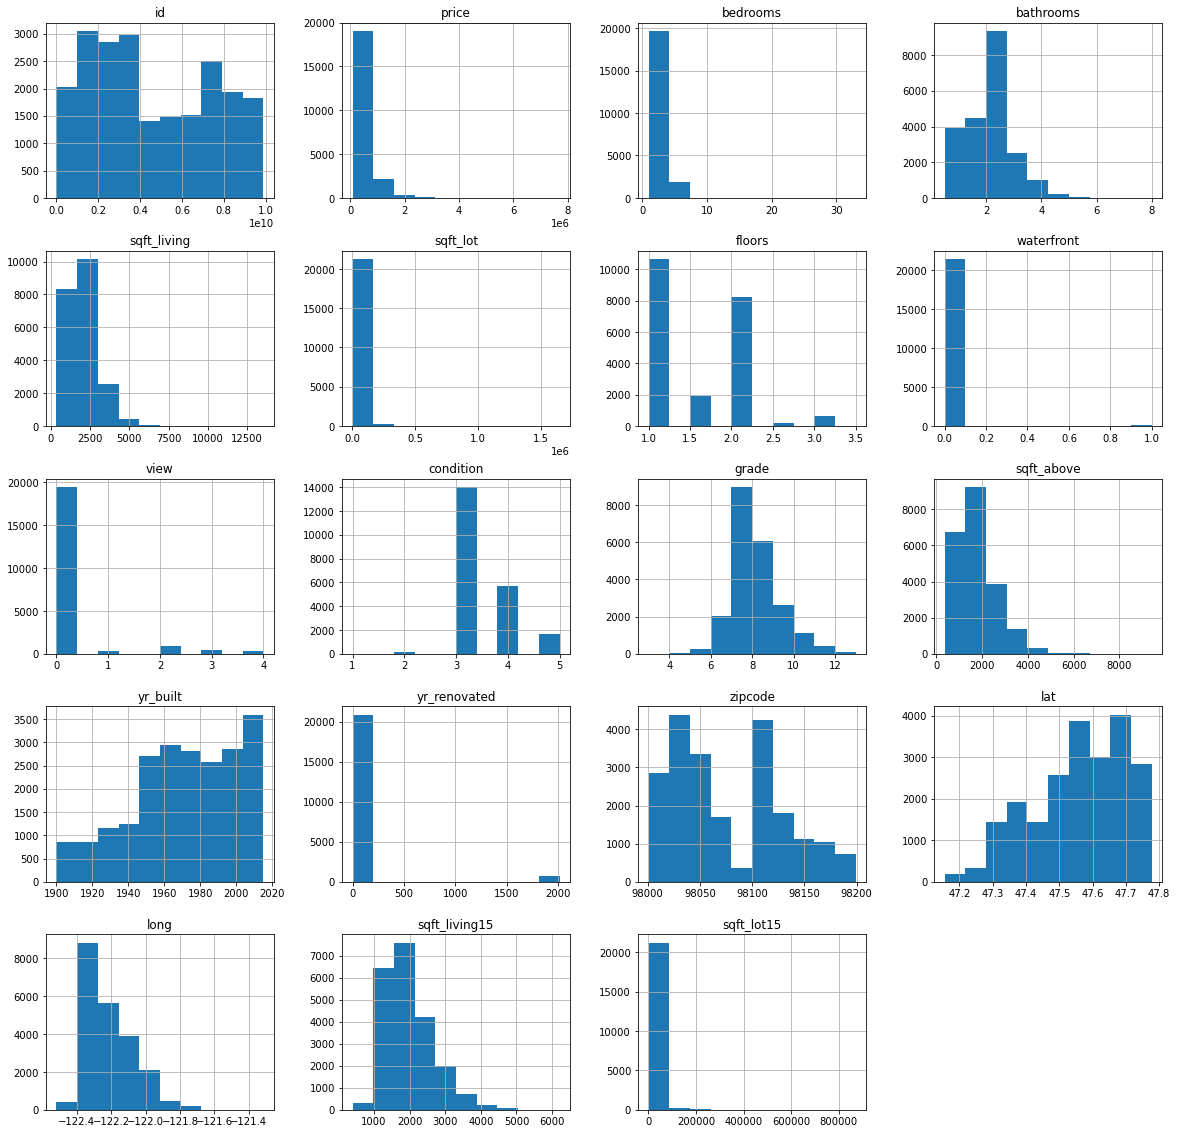

In [98]:
#Checking Potential Feature Types

data.hist(figsize=(20,20));

In [99]:
#Seperate Cat Data from Cont Data

cont_data = ['sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement']

cat_data = []

target_variable =['price']

for item in data.columns:
    if item not in cont_data:
        cat_data.append(item)

In [100]:
#Fix question marks in basement

data['sqft_basement'].replace({"?": float(0)}, inplace=True)

In [101]:
#remove 'id', 'price' and 'basement' from cat_data

cat_data.remove('id')

cat_data.remove('price')

cont_data.remove('sqft_basement')


In [102]:
#Check cat_data and cont_data

print('cat_data: ')
print(cat_data)

print('cont_data: ')
print(cont_data)

cat_data: 
['date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']
cont_data: 
['sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15']


## Part III B: Data Processing

Now that data has been segregated into its proper categories the following processing steps will take place along with modelling:

1. Categorical Data will be split into different binary columns
2. Continuous data will be normalized in order to ensure minimal heteroskedasticity
3. Target Variable will be normalized in order to ensure minimal heteroskedasticity
4. A features data set will be created in order to refer to processed data quickly later on

In [103]:
#Quick Processing Data

###Ignore warnings:

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#One Hot (So Hawt) Encode

data_ohe = pd.get_dummies(data[cat_data], drop_first = True)

#Create Cont Dataset

data_cont = data[cont_data]

#Log Cont Data

logged_features = []

for item in list(data_cont.columns):
    data_cont[f'{item}_log'] = np.log(data_cont[item])
    logged_features.append(f'{item}_log')
    
#Log Target Variable

data['price_logged'] = np.log(data['price'])

#Create Features DataFrame
    
features_df = pd.concat([data['price_logged'], data_cont[logged_features], data_ohe], axis = 1)

## Part IV: Modelling and Adhoc Data Prep

Modelling will undergo an interative process which will involve the following steps:

1. Running an initial baseline model (worst model)
2. Feature engineering
3. Checking for Heteroskedasticity
4. Checking for Multicolinearity
5. Ensuring are R2 of 85% or higher

In [104]:
#Model 1: Dumbest Model

#Establish X and y

X = features_df.drop(columns = ['price_logged'])
y = features_df['price_logged']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))


-914932085548734.4

### Part IV Model 1: Results

Initial R2 scores are very low, and potentially the result of too many features in the model. 

Resulting R2 of -914932085548734.4

#### Next Actions:

In order to mitigate this, a second model will be run which will only use the continuous variables.

In [105]:
#Model 2: Model without Categorical Features

#Establish X and y

X = features_df[logged_features]
y = features_df['price_logged']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))

0.5516699588367212

### Part IV Model 2: Results

R2 scores appear to be much higher when Categorical Variables are removed which indicates that Categorical variables may be the reason behind low R2 scores in Model 1. 

Resulting R2 of 0.5879312093456035

#### Next Actions:

In order to mitigate this, the Categorical Variables which result in the most dummy columns will be categorized.

The following will be assessed first:

'yr_built', 'yr_renovated', 'zipcode'


In [106]:
#Unique Value Counts for 'yr_built', 'yr_renovated', 'zipcode'

print('yr_built unique values: ')
print(len(data['yr_built'].unique()))

print('yr_renovated unique values: ')
print(len(data['yr_renovated'].unique()))

print('zipcode unique values: ')
print(len(data['zipcode'].unique()))

yr_built unique values: 
116
yr_renovated unique values: 
70
zipcode unique values: 
70


In [107]:
#Restructure yr_built into a continuous variable called 'age'

data['age'] = data['yr_built'].apply(lambda x: 2021 - x)


In [108]:
#Restructure yr_rennovated into a continuous variable called 'renovated_x_years_ago'

data['renovated_x_years_ago'] = data['yr_renovated'].apply(lambda x: 2021 - x if x != 0 else 0)

In [109]:
#Create new buckets for refurbished data

def refurbished(x):
    if x == 0:
        return "Never Refurbished"
    elif x <= 10:
        return "Refurbished less than 10 Years Ago"
    else:
        return "Refurbished More than 10 Years Ago"
    
refurbished(9)

data['refurbished'] = data['renovated_x_years_ago'].apply(lambda x: refurbished(x))

#Refurbished Data Check

data[data['renovated_x_years_ago'] > 10][['refurbished', 'renovated_x_years_ago']]

data['refurbished'].value_counts()

Never Refurbished                     20853
Refurbished More than 10 Years Ago      609
Refurbished less than 10 Years Ago      135
Name: refurbished, dtype: int64

In [110]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_logged', 'age',
       'renovated_x_years_ago', 'refurbished'],
      dtype='object')

In [111]:
#Adding Age to Cont Data

cont_data = [
 'sqft_living',
 'sqft_lot',
 'grade',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'age']

In [112]:
#Removing 'date', lat', 'long', 'yr_built', and 'yr_renovated' from Cat Data

cat_data = [
 'bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'zipcode',
 'refurbished']

In [113]:
#Recreate Features Data Set

#Quick Processing Data

###Ignore warnings:

###Ignore warnings:

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#One Hot (So Hawt) Encode

data_ohe = pd.get_dummies(data[cat_data], drop_first = True)

#Create Cont Dataset

data_cont = data[cont_data]

#Log Cont Data

logged_features = []

for item in list(data_cont.columns):
    data_cont[f'{item}_log'] = np.log(data_cont[item])
    logged_features.append(f'{item}_log')
    
#Log Target Variable

data['price_logged'] = np.log(data['price'])

#Create Features DataFrame
    
features_df = pd.concat([data['price_logged'], data_cont[logged_features], data_ohe], axis = 1)

In [114]:
#Model 3: Model without 'lat', 'long', 'yr_built', and 'yr_renovated' but now includes 'refurbished' and 'age'

#Establish X and y

X = features_df.drop(['price_logged'], axis = 1)
y = features_df['price_logged']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))

0.6242158568177623

### Part IV Model 3 Results

R2 scores have marginally improved, but location is currently being ignored as the get_dummies function is not recognizing the 'zipcode' feature as a categorical variable. 

Resulting R2: 0.6242158568177623

#### Next Actions:

Model 4 will turn Zipcode into str and use it to create 70 binary columns.

In [115]:
#Convert zipcode to a str

data['zipcode_str'] = data['zipcode'].apply(lambda x: str(x))

In [116]:
#Establish new Cont and Cat data

cont_data = [
 'sqft_living',
 'sqft_lot',
 'grade',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'age']

cat_data = [
 'bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'zipcode_str',
 'refurbished']

In [117]:
#Recreate Features Data Set

#Quick Processing Data

###Ignore warnings:

###Ignore warnings:

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#One Hot (So Hawt) Encode

data_ohe = pd.get_dummies(data[cat_data], drop_first = True)

#Create Cont Dataset

data_cont = data[cont_data]

#Log Cont Data

logged_features = []

for item in list(data_cont.columns):
    data_cont[f'{item}_log'] = np.log(data_cont[item])
    logged_features.append(f'{item}_log')
    
#Log Target Variable

data['price_logged'] = np.log(data['price'])

#Create Features DataFrame
    
features_df = pd.concat([data['price_logged'], data_cont[logged_features], data_ohe], axis = 1)

In [118]:
#Model 4: Model without 'lat', 'long', 'yr_built', and 'yr_renovated' but now includes 'refurbished' and 'age'

#Establish X and y

#Establish X and y

X = features_df.drop(['price_logged'], axis = 1)
y = features_df['price_logged']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))

0.8791097638815346

### Part IV Model 4: Results

Model 4 has resulted in a much higher R2 score, which I believe has resulted from taking location into account as a categorical variable split into different buckets.

Resulting R2 Score: 0.8791097638815346

#### Next Steps:

As such the following steps will be taken:

1. Check for further Heteroskedasticity and Polynomial Patterns
2. Check for Multicolinearity
3. Check for potential interactions
4. Select features

Text(0, 0.5, 'Predicted')

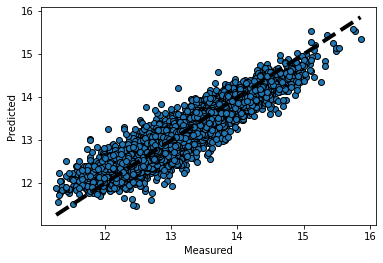

In [119]:
#Checking for further heteroskedasticity and potential polynomial patterns (code taken from Scikitlearn Doc
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html#sphx-glr-auto-examples-model-selection-plot-cv-predict-py)

from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

## Heteroskedasticity Analysis Results:

The model is relatively homoskedastic and linear. This is probably due to previously having normalized the features.

No further actions will be taken on this front to enhance the model's accuracy.

In [120]:
#   Checking for Multi-Colinearity (code copy pasted from Curriculum Lab: 
#   https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution)

df = features_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

colinear_pairs = df[(df.cc>.75) & (df.cc<1)]

colinear_pairs

,cc
pairs,
"(sqft_lot_log, sqft_lot15_log)",0.92
"(sqft_living_log, sqft_above_log)",0.86
"(bathrooms, sqft_living_log)",0.76


In [121]:
#Create a colinear_pairs data frame

colinear_pairs.columns = ['colinearity']

colinear_pairs = colinear_pairs.reset_index(drop=False)

colinear_pairs

,pairs,colinearity
0,"(sqft_lot_log, sqft_lot15_log)",0.92
1,"(sqft_living_log, sqft_above_log)",0.86
2,"(bathrooms, sqft_living_log)",0.76


In [122]:
#Checking for most prominent features (code taken from curriculum)

linreg.fit(X, y)

myDict = dict(zip(X.columns, linreg.coef_))

# Isolating least valuable features from colinear pairs

colinear_pairs['pair_1'] = colinear_pairs['pairs'].apply(lambda x: x[0])
colinear_pairs['pair_2'] = colinear_pairs['pairs'].apply(lambda x: x[1])
colinear_pairs['coef_1'] = colinear_pairs['pair_1'].apply(lambda x: myDict[x])
colinear_pairs['coef_2'] = colinear_pairs['pair_2'].apply(lambda x: myDict[x])
colinear_pairs['lesser_coef'] = np.where((colinear_pairs['coef_1'] > colinear_pairs['coef_2']), 
                                          colinear_pairs['pair_2'], colinear_pairs['pair_1'])

dropped_pairs = colinear_pairs['lesser_coef']

print(f'Pairs to Potentially Drop:')
dropped_pairs

Pairs to Potentially Drop:


0    sqft_lot15_log
1    sqft_above_log
2         bathrooms
Name: lesser_coef, dtype: object

## Multicolinearity Analysis Results

It appears that there are 4 pair candidates for Multicolinearity:

0	(sqft_lot_log_scaled, sqft_lot15_log_scaled)	0.918712
1	(refurbished_Refurbished More than 10 Years Ag...	0.901679
2	(sqft_living_log_scaled, sqft_above_log_scaled)	0.865059
3	(sqft_living_log_scaled, bathrooms)

In order to determine which feature to keep, a DF was created which isolated the most prominent feature.

based on this analysis the following pairs have been reccomended to be dropped:

 'sqft_lot15_log_scaled',
 'refurbished_Never Refurbished',
 'sqft_above_log_scaled',
 'bathrooms'
 
 #### Next Actions:
 
 1. It appears that sqft_lot15 is a function of the sqft_lot and will be dropped.
 2. Refurbishing a house seems to have a binary effect on the model, wherein a refurbished house sells for more
    regardless of when it was refurbished. In order to cut down on features, a new column will be created to
    reflect that.
 3. 'sqft_above' seems to also be a function of 'sqft_living' and will be dropped
 4. Houses with larger floor plans have more bathrooms, but this doesn't mean that bathrooms is a function 
    of floor space, as such bathrooms will be kept.

In [123]:
#Create look up list of cat / cont features to be droppped

dropped_colinear_features = ['sqft_lot15', 'sqft_above']

def drop_colinear_features(feature_list):
    for item in feature_list:
        if item in dropped_colinear_features:
            feature_list.remove(item)
            
drop_colinear_features(cat_data)
drop_colinear_features(cont_data)

print(f'Cont Data:')
print(cont_data)

print(f'Cat Data:')
print(cat_data)

Cont Data:
['sqft_living', 'sqft_lot', 'grade', 'sqft_living15', 'age']
Cat Data:
['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'zipcode_str', 'refurbished']


In [124]:
#Drop first 'refurbished' and ' renovated_x_years_ago' columns

data.drop(['refurbished'], axis = 1, inplace=True)
data.drop(['renovated_x_years_ago'], axis = 1, inplace=True)

#create 'ever_refurbished' to reflect whether or not a house has even been refurbished

data['refurbished'] = np.where((data['yr_renovated'] > 0),1,0)

In [125]:
#Recreate Features Data Set

#Quick Processing Data

###Ignore warnings:

###Ignore warnings:

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#One Hot (So Hawt) Encode

data_ohe = pd.get_dummies(data[cat_data], drop_first = True)

#Create Cont Dataset

data_cont = data[cont_data]

#Log Cont Data

logged_features = []

for item in list(data_cont.columns):
    data_cont[f'{item}_log'] = np.log(data_cont[item])
    logged_features.append(f'{item}_log')
    
#Log Target Variable

data['price_logged'] = np.log(data['price'])

#Create Features DataFrame
    
features_df = pd.concat([data['price_logged'], data_cont[logged_features], data_ohe], axis = 1)

In [126]:
##Model 5: Model 4 without colinearity and binary categorizaiton for refurbished

#Establish X and y

X = features_df
X = X.drop(['price_logged'], axis = 1)
y = features_df['price_logged']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

baseline = np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))

baseline

0.8758112330503414

### Part IV Model 5 Results:

Reducing features inevitably led to a reduction in the R2 score, however, I believe this will be beneficial
when we begin exploring iterations. 

Resulting R2 Score: 0.8758112330503414

#### Next steps:

1. Create a polynomial & interaction dataset
2. Iterate through the data set and determine which features result in increased R2 scores
3. Select those features with the highest R2 Scores to be integrated into the model

In [127]:
#Create Polynomial & Interaction Dataset to determine any further relationships/improvements to the model

import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

#Create a copy of X

X2 = X.copy()

#take out zipcodes to lessen iteration

non_zipcode_features = []

for item in X2.columns:
    if 'zip' not in item:
        non_zipcode_features.append(item)

#Create polynomial features

X2_poly = poly.fit_transform(X2[non_zipcode_features])

#Get polynomial column names

X2_poly_column_names = poly.get_feature_names(input_features = X.columns)

#create polynomial features Data Frame

X2_poly_df = pd.DataFrame(X2_poly)

#add column names to polynomial features Data Frame

X2_poly_df.columns = list(X2_poly_column_names)

#Isolate New Features

new_features = []

for item in X2_poly_df.columns:
    if item not in X.columns:
        new_features.append(item)

In [128]:
# #Locate Useful Features from Polynomial Data Set

# useful_features = []
# useful_scores = []

# for item in new_features:
    
#     x_improve = pd.concat([X, X2_poly_df[item]], axis = 1)

#     #Instantiate Linear Regression and execute Cross Val Score for Model Validation to establish baseline
    
#     new_score = np.mean(cross_val_score(linreg, x_improve, y, cv = 10, scoring='r2'))

#     if new_score > baseline:
#         useful_features.append(item)
#         useful_scores.append(new_score)

In [129]:
useful_features =['sqft_living_log^2',
 'sqft_living_log sqft_lot_log',
 'sqft_living_log grade_log',
 'sqft_living_log sqft_living15_log',
 'sqft_living_log age_log',
 'sqft_living_log bedrooms',
 'sqft_living_log bathrooms',
 'sqft_living_log floors',
 'sqft_living_log waterfront',
 'sqft_living_log condition',
 'sqft_living_log refurbished',
 'sqft_lot_log^2',
 'sqft_lot_log grade_log',
 'sqft_lot_log sqft_living15_log',
 'sqft_lot_log age_log',
 'sqft_lot_log bedrooms',
 'sqft_lot_log bathrooms',
 'sqft_lot_log floors',
 'sqft_lot_log waterfront',
 'sqft_lot_log view',
 'sqft_lot_log condition',
 'grade_log^2',
 'grade_log sqft_living15_log',
 'grade_log age_log',
 'grade_log bedrooms',
 'grade_log bathrooms',
 'grade_log floors',
 'grade_log waterfront',
 'grade_log view',
 'grade_log condition',
 'grade_log refurbished',
 'sqft_living15_log^2',
 'sqft_living15_log age_log',
 'sqft_living15_log bedrooms',
 'sqft_living15_log bathrooms',
 'sqft_living15_log floors',
 'sqft_living15_log waterfront',
 'sqft_living15_log condition',
 'age_log^2',
 'age_log bedrooms',
 'age_log bathrooms',
 'age_log waterfront',
 'age_log condition',
 'bedrooms bathrooms',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms condition',
 'bedrooms refurbished',
 'bathrooms^2',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms condition',
 'bathrooms refurbished',
 'floors^2',
 'floors view',
 'floors condition',
 'floors refurbished',
 'view^2',
 'view condition',
 'condition refurbished']

useful_scores = [0.8785330543179738,
 0.8760729761095496,
 0.8804794087892034,
 0.8771785625275171,
 0.8808082863304876,
 0.8765670209185149,
 0.8791185212700812,
 0.8805043748670144,
 0.8758816413925625,
 0.8764937215506297,
 0.875872884860836,
 0.8766275748311143,
 0.8758554341044814,
 0.8766703748707517,
 0.8777570620401429,
 0.8762851966555092,
 0.8759994379981813,
 0.8773677312360364,
 0.8758821521264089,
 0.8758748807861464,
 0.8761563010319657,
 0.8790509609697985,
 0.8778773825382871,
 0.8782012764992787,
 0.8779094307836186,
 0.8792043940236525,
 0.8771352918673105,
 0.8758331815468603,
 0.8758965915501168,
 0.8761289495770785,
 0.8759184420939101,
 0.8768223618177211,
 0.87823723270944,
 0.8760616278891918,
 0.8775570101659114,
 0.878212604742196,
 0.8758437950177973,
 0.8760187057791782,
 0.8795189484136825,
 0.8773168053769382,
 0.8784171595499013,
 0.8759210464845744,
 0.8773997611295739,
 0.8764413812816974,
 0.87828629999567,
 0.8758385123116035,
 0.8758910088501421,
 0.875834293145951,
 0.8770741739516537,
 0.8766877468513179,
 0.8758885970482492,
 0.8761792361029249,
 0.8759116706141187,
 0.876982113300819,
 0.8758433224824304,
 0.875927474246836,
 0.8758147703276645,
 0.8758301423023648,
 0.8758304143020779,
 0.8758377128082933]

In [130]:
#Sorting out top features by tiers of 10, 5, 3 and 1

potential_features = pd.DataFrame(useful_features)

potential_features['useful_scores'] = useful_scores

potential_features.columns =['potential_features', 'useful_scores']

top10_features = list(potential_features.sort_values(by = 'useful_scores', ascending = False).head(10)
                       ['potential_features'])

top5_features = list(potential_features.sort_values(by = 'useful_scores', ascending = False).head(5)
                       ['potential_features'])

top3_features = list(potential_features.sort_values(by = 'useful_scores', ascending = False).head(3)
                       ['potential_features'])

top_feature = list(potential_features.sort_values(by = 'useful_scores', ascending = False).head(1)
                       ['potential_features'])

potential_features.sort_values(by = 'useful_scores', ascending = False).head()

,potential_features,useful_scores
4,sqft_living_log age_log,0.88
7,sqft_living_log floors,0.88
2,sqft_living_log grade_log,0.88
38,age_log^2,0.88
25,grade_log bathrooms,0.88


In [131]:
#Establish improved new baseline score with all new features

X_improved = pd.concat([X, X2_poly_df[useful_features]], axis = 1)

np.mean(cross_val_score(linreg, X_improved, y, cv = 10, scoring='r2'))

0.8870030376033405

In [132]:
#Estimate effect of only using the top 10 features

X_improved = pd.concat([X, X2_poly_df[top10_features]], axis = 1)

np.mean(cross_val_score(linreg, X_improved, y, cv = 10, scoring='r2'))

0.8842457333071179

In [133]:
#Estimate effect of only using the top 5 features

X_improved = pd.concat([X, X2_poly_df[top5_features]], axis = 1)

np.mean(cross_val_score(linreg, X_improved, y, cv = 10, scoring='r2'))

0.8840613945175123

In [134]:
#Estimate effect of only using the top 3 features

X_improved = pd.concat([X, X2_poly_df[top3_features]], axis = 1)

np.mean(cross_val_score(linreg, X_improved, y, cv = 10, scoring='r2'))

0.8824761478183705

In [135]:
#Estimate effect of only using the top feature

X_improved = pd.concat([X, X2_poly_df[top_feature]], axis = 1)

print(np.mean(cross_val_score(linreg, X_improved, y, cv = 10, scoring='r2')))
print(top_feature)

0.8808082863304876
['sqft_living_log age_log']


### Part IV Model 6, 7, 8, 9 and 10:

There is a strong interaction between the following features:

'sqft_living_log_scaled age_log_scaled'
'sqft_living_log_scaled floors'
'sqft_living_log_scaled grade_log_scaled'

Optimizing my selecting only these top 3 features results in an R2 of 0.8824

Addition of these elemnts increase the R2 back above 0.88 which are enough to keep them by this model's standards

#### Next Steps:

Model Evaluation

In [136]:
X_improved = pd.concat([X, X2_poly_df[top3_features]], axis = 1)

In [147]:
#Feature Analysis by Coeffcient broken down into Zipcodes and Non Zipcodes

pd.options.display.float_format = '{:,.2f}'.format

final_model = linreg.fit(X, y)

coef_analysis_df = pd.DataFrame(final_model.coef_)

coef_analysis_df.columns = ['Coef']

coef_analysis_df['abs_Coef'] = abs(coef_analysis_df['Coef'])

coef_analysis_df['feature'] = X.columns

non_zip_coefs = coef_analysis_df[~coef_analysis_df['feature'].str.contains('zip')].sort_values(by =
                                                                                              'abs_Coef',
                                                                                              ascending = False)

zip_coefs = coef_analysis_df[coef_analysis_df['feature'].str.contains('zip')].sort_values(by =
                                                                                              'abs_Coef',
                                                                                              ascending = False)

In [148]:
#Quick Analysis of non_zip_coefs, based on absolute effect on the model:

non_zip_coefs

non_zip_coefs['Percentage_Effect'] = np.where(non_zip_coefs['feature'].str.contains('log'), non_zip_coefs['Coef'], 
                                              non_zip_coefs['Coef'].apply(lambda x: 100 * (np.exp(x) - 1)))

non_zip_coefs.sort_values(by='Percentage_Effect', ascending = False)

,Coef,abs_Coef,feature,Percentage_Effect
8,0.49,0.49,waterfront,62.75
11,0.09,0.09,refurbished,9.07
9,0.06,0.06,view,6.49
10,0.05,0.05,condition,5.64
6,0.03,0.03,bathrooms,2.96
7,0.01,0.01,floors,0.83
2,0.70,0.70,grade_log,0.70
0,0.38,0.38,sqft_living_log,0.38
3,0.17,0.17,sqft_living15_log,0.17
1,0.07,0.07,sqft_lot_log,0.07


In [149]:
#Quick Analysis of non_zip_coefs, based on absolute effect on the model:

zip_coefs['Percentage_Effect'] = zip_coefs['Coef'].apply(lambda x: 100 * (np.exp(x) - 1))

zip_coefs.sort_values(by='Percentage_Effect', ascending = False)

,Coef,abs_Coef,feature,Percentage_Effect
35,1.35,1.35,zipcode_str_98039,285.68
14,1.15,1.15,zipcode_str_98004,215.67
59,1.12,1.12,zipcode_str_98112,205.24
58,1.06,1.06,zipcode_str_98109,188.27
52,1.04,1.04,zipcode_str_98102,183.18
...,...,...,...,...
12,0.02,0.02,zipcode_str_98002,2.37
13,0.02,0.02,zipcode_str_98003,2.02
51,0.01,0.01,zipcode_str_98092,1.31
31,-0.01,0.01,zipcode_str_98032,-0.94


In [150]:
#Creating a scaled X_improved to determine scaled effect of Coefficients

scaler = StandardScaler()

X_improved_scaled = scaler.fit_transform(X_improved)

linreg.fit(X_improved_scaled, y)

LinearRegression()

In [151]:
#Scaled Feature Analysis by Coeffcient broken down into Zipcodes and Non Zipcodes 

pd.options.display.float_format = '{:,.2f}'.format

final_model = linreg.fit(X, y)

coef_analysis_df = pd.DataFrame(final_model.coef_)

coef_analysis_df.columns = ['Coef']

coef_analysis_df['abs_Coef'] = abs(coef_analysis_df['Coef'])

coef_analysis_df['feature'] = X.columns

non_zip_coefs = coef_analysis_df[~coef_analysis_df['feature'].str.contains('zip')].sort_values(by =
                                                                                              'abs_Coef',
                                                                                              ascending = False)

zip_coefs = coef_analysis_df[coef_analysis_df['feature'].str.contains('zip')].sort_values(by =
                                                                                              'abs_Coef',
                                                                                              ascending = False)

In [152]:
#Assessment of top non_zipcode features by scaled effect on the Model

non_zip_coefs

,Coef,abs_Coef,feature
2,0.70,0.70,grade_log
8,0.49,0.49,waterfront
0,0.38,0.38,sqft_living_log
3,0.17,0.17,sqft_living15_log
11,0.09,0.09,refurbished
1,0.07,0.07,sqft_lot_log
9,0.06,0.06,view
10,0.05,0.05,condition
6,0.03,0.03,bathrooms
4,-0.02,0.02,age_log


In [153]:
#Assessment of top zipcode features by scaled effect on the Model

zip_coefs.head(5)

,Coef,abs_Coef,feature
35,1.35,1.35,zipcode_str_98039
14,1.15,1.15,zipcode_str_98004
59,1.12,1.12,zipcode_str_98112
58,1.06,1.06,zipcode_str_98109
52,1.04,1.04,zipcode_str_98102


Grade mean: 7.657915451220076
Percetnage increase from scoring 2.3420845487799236 higher than the grade mean:0.21408687450117303


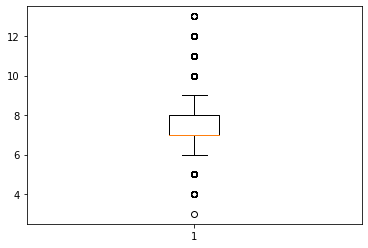

In [154]:
#Quick analysis on Grade and the effect of scoring higher than the mean

plt.boxplot(data['grade'])

grade_mean = data['grade'].mean()

print(f'Grade mean: {grade_mean}')
print(f'Percetnage increase from scoring {10-grade_mean} higher than the grade mean:{((10/grade_mean)-1)*0.7}')

Sqft mean: 2080.3218502569803
Percetnage increase from scoring 419.67814974301973 
higher than the grade mean: 0.07666010760914106


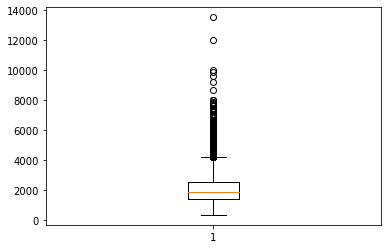

In [311]:
#Quick analysis on Sqft and the effect of scoring higher than the mean

plt.boxplot(data['sqft_living'])

sqft_mean = data['sqft_living'].mean()

print(f'Sqft mean: {sqft_mean}')
print(f'''Percetnage increase from scoring {2500-sqft_mean} 
higher than the grade mean: {((2500/sqft_mean)-1)*0.38}''')

## Part V: Evaluation

Based on our model with an R2 of ~0.87, the following features are deemed most valuable:

### Location:

With all factors held constant, adding a waterfront view can increase home value by up to 63%. This model further verifies this assumption when assessing zipcodes.

Particularly the top 5 Zipcodes which drive price up are all in waterfront locations and construction in any of these zipcodes can result in prices 2X to 3X higher than non waterfront locations.

### Grade:

High Grading in the King County Housing Grading metric also has a large effect on price.

Specifically a 1% increase in Grade can result in a 0.7% increase in price.

If one were to score 10/13 (roughly 2.3 points higher than the grade mean), and all other factors were held
constant, price would increase by 21%.

### Size

Without surprise, livable square feet also has a significant impact on price.

Precisely, a 1% increase in square footage can result in a 0.4% increase in price.

If one were to compare 2 houses, with all other factors held equal, with one house being 2,080 SQFT and the other
2,500 SQFT, the latter house would cost almost 8% more than the prior.


Total increase in mean price: 0.5495614054820592


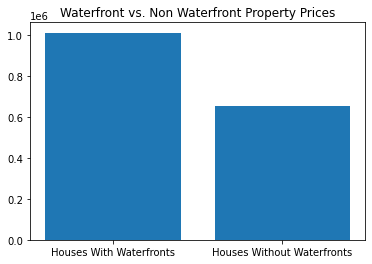

In [298]:
##Data Validation waterfront location

evaluation_df = data[['price', 'sqft_living', 'waterfront', 'grade', 'zipcode']]

wf_mean = evaluation_df[(evaluation_df['grade'] == 8) & (evaluation_df['sqft_living'] < 3000)
             & (evaluation_df['sqft_living'] > 2800) & (evaluation_df['waterfront'] == 1)]['price'].mean()

wf_mean

no_wf_mean = evaluation_df[(evaluation_df['grade'] == 8) & (evaluation_df['sqft_living'] < 3000)
             & (evaluation_df['sqft_living'] > 2800) & (evaluation_df['waterfront'] == 0)]['price'].mean()

no_wf_mean

##Plotting results in a bar graph

fig = plt.figure()
ax = fig.add_subplot(111)

A = ["Houses With Waterfronts", "Houses Without Waterfronts"]
B = [wf_mean, no_wf_mean]

plt.bar(A,B)

plt.title('Waterfront vs. Non Waterfront Property Prices');
print(f'Total increase in mean price: {(wf_mean/no_wf_mean)-1}')

Total increase in mean price: 0.6718113347326831


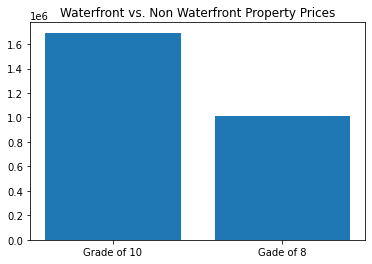

In [300]:
##Data Validation waterfront grade

evaluation_df = data[['price', 'sqft_living', 'waterfront', 'grade', 'zipcode']]

wf_mean = evaluation_df[(evaluation_df['grade'] == 10) & (evaluation_df['sqft_living'] < 3000)
             & (evaluation_df['sqft_living'] > 2800) & (evaluation_df['waterfront'] == 1)]['price'].mean()

wf_mean

no_wf_mean = evaluation_df[(evaluation_df['grade'] == 8) & (evaluation_df['sqft_living'] < 3000)
             & (evaluation_df['sqft_living'] > 2800) & (evaluation_df['waterfront'] == 1)]['price'].mean()

no_wf_mean

##Plotting results in a bar graph

fig = plt.figure()
ax = fig.add_subplot(111)

A = ["Grade of 10", "Gade of 8"]
B = [wf_mean, no_wf_mean]

plt.bar(A,B)

plt.title('High Grade vs. Low Grade Property Prices');

plt.title('Waterfront vs. Non Waterfront Property Prices');
print(f'Total increase in mean price: {(wf_mean/no_wf_mean)-1}')

Total increase in mean price: 0.2836041358936485


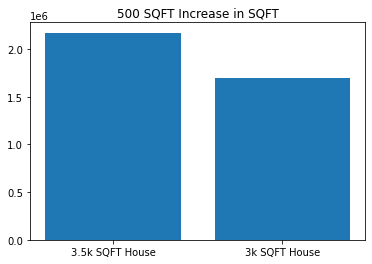

In [310]:
##Data Validation waterfront grade

evaluation_df = data[['price', 'sqft_living', 'waterfront', 'grade', 'zipcode']]

wf_mean = evaluation_df[(evaluation_df['grade'] == 10) & (evaluation_df['sqft_living'] < 3500)
             & (evaluation_df['sqft_living'] > 3200) & (evaluation_df['waterfront'] == 1)]['price'].mean()

wf_mean

no_wf_mean = evaluation_df[(evaluation_df['grade'] == 10) & (evaluation_df['sqft_living'] < 3000)
             & (evaluation_df['sqft_living'] > 2800) & (evaluation_df['waterfront'] == 1)]['price'].mean()

no_wf_mean

##Plotting results in a bar graph

fig = plt.figure()
ax = fig.add_subplot(111)

A = ["3.5k SQFT House", "3k SQFT House"]
B = [wf_mean, no_wf_mean]

plt.bar(A,B)

plt.title('500 SQFT Increase in SQFT');

print(f'Total increase in mean price: {(wf_mean/no_wf_mean)-1}')

## Part VI: Deployment

It is our reccomendation that the housing development be built on by a waterfront property, focus on achieving high scores on the King County grading metric, and scale their houses accordingly based on the metrics provided in our evaluation phase.